# P2P1 Finite Elements for Stokes Equations

This example is to show the convergence of P2-P1 finite elements for the Stokes equation on the unit square:

$$- \Delta u + {\rm grad}\, p  = f \quad {\rm div}\, u    = 0  \quad  \text{ in } \quad \Omega,$$

with the pure Dirichlet boundary condition. The solver is based on a DGS type smoother. 

**References**:
- [Finite Element Methods For Stokes Equations](http://www.math.uci.edu/~chenlong/226/FEMStokes.pdf)
- [Project: Finite Element Methods for Stokes Equations](../project/projectFEM.html)

**Subroutines**:

    - StokesP2P1
    - squareStokes
    - femStokes
    - Stokesfemrate
    
The method is implemented in `StokesP2P1` subroutine and can be tested in `squareStokes`. Together with other elements (P2P0, P2P1, isoP2P0, isoP2P1, P1bP1), `femStokes` provides a concise interface to solve Stokes equation. The P2-P1 element is tested in `Stokesfemrate`.

## P2-P1 element

The velocity is P2 Lagrange element and the pressure is P1 Lagrange element. This pair is known as Taylor-Hood element. 

We plot the dof below and refer to [PoissonP2femrate](PoissonP2femrate.html) for basis and data structure for P2 element on triangles and [Poissonfemrate](Poissonfemrate.html) for basis of P1 element.

In [3]:
clear all;
imatlab_export_fig('print-png')  % Static png figures.
%% Local indexing of DOFs
node = [0,0; 1,0; 0.5, sqrt(3)/2];
elem = [1 2 3];
edge = [2 3; 1 3; 1 2];
% elem2dof = 1:6;
set(gcf,'Units','normal'); 
set(gcf,'Position',[0,0,0.3,0.2]);
subplot(1,2,1)
showmesh(node,elem);
findnode(node);
findedgedof(node,edge);
subplot(1,2,2)
showmesh(node,elem);
findnode(node);

## Dirichlet boundary condition

In [4]:
%% Setting
% mesh
[node,elem] = squaremesh([0,1,0,1],0.25);
[node,elem] = uniformrefine(node,elem);
bdFlag = setboundary(node,elem,'Dirichlet');
mesh = struct('node',node,'elem',elem,'bdFlag',bdFlag);
% pde
pde = Stokesdata1; 
% options
option.L0 = 0;
option.maxIt = 4;
option.printlevel = 1;
option.solver = 'mg';

#dof:   2211,  #nnz:  33258, level:  3  MG WCYCLE iter:  8,  err = 8.2472e-09,  time =  0.2 s
#dof:   9027,  #nnz: 140138, level:  4  MG WCYCLE iter:  9,  err = 4.3887e-09,  time = 0.21 s
#dof:  36483,  #nnz: 575082, level:  5  MG WCYCLE iter:  9,  err = 5.5107e-09,  time = 0.66 s
#dof: 146691,  #nnz: 2329706, level:  6  MG WCYCLE iter:  9,  err = 4.7123e-09,  time =  2.9 s
Table: Error
 #Dof        h      |u_I-u_h|_1    ||u-u_h||   ||u_I-u_h||_{max}

  2467   6.25e-02   1.43292e-03   2.40354e-04   3.01768e-04
  9539   3.12e-02   1.80989e-04   2.99933e-05   3.79340e-05
 37507   1.56e-02   2.27453e-05   3.74728e-06   4.75508e-06
148739   7.81e-03   2.91812e-06   4.68344e-07   5.95221e-07

 #Dof        h      ||p_I-p_h||    ||p-p_h||   

  2467   6.25e-02   2.29486e-02   1.65715e-02
  9539   3.12e-02   5.66227e-03   4.08540e-03
 37507   1.56e-02   1.41097e-03   1.01768e-03
148739   7.81e-03   3.52470e-04   2.54193e-04

Table: CPU time
 #Dof    Assemble     Solve      Error      Mesh    


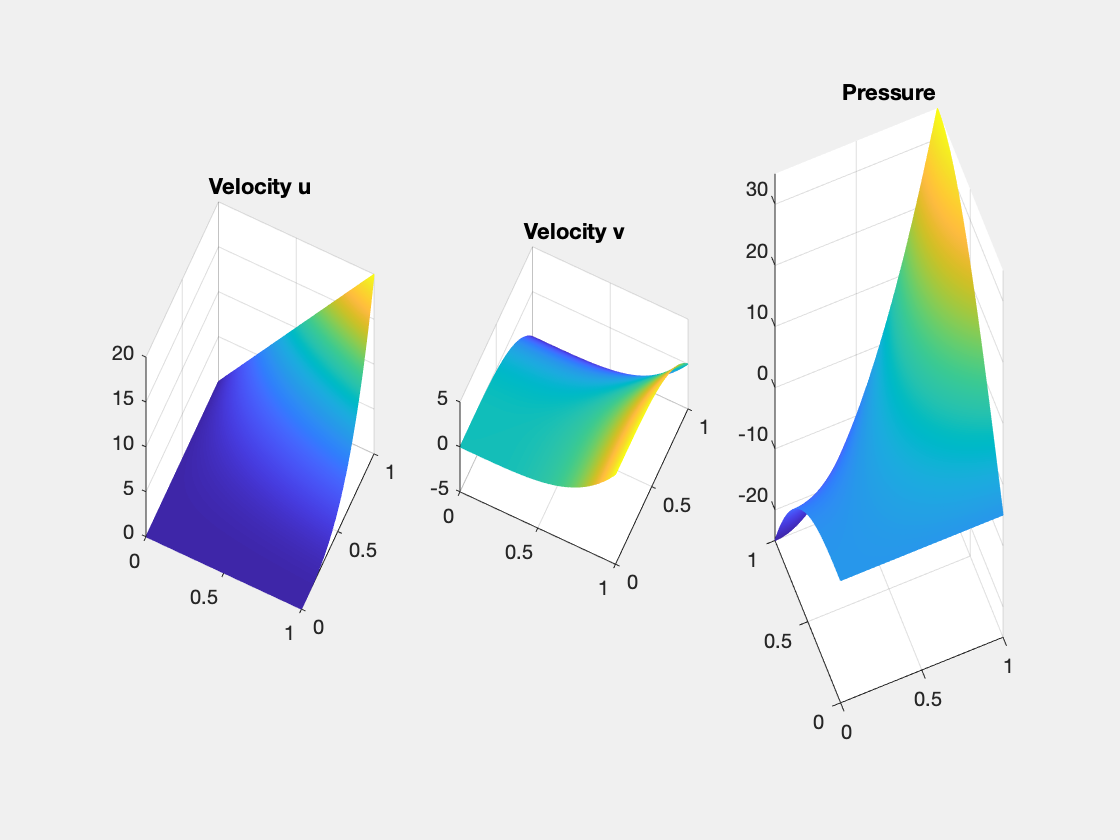

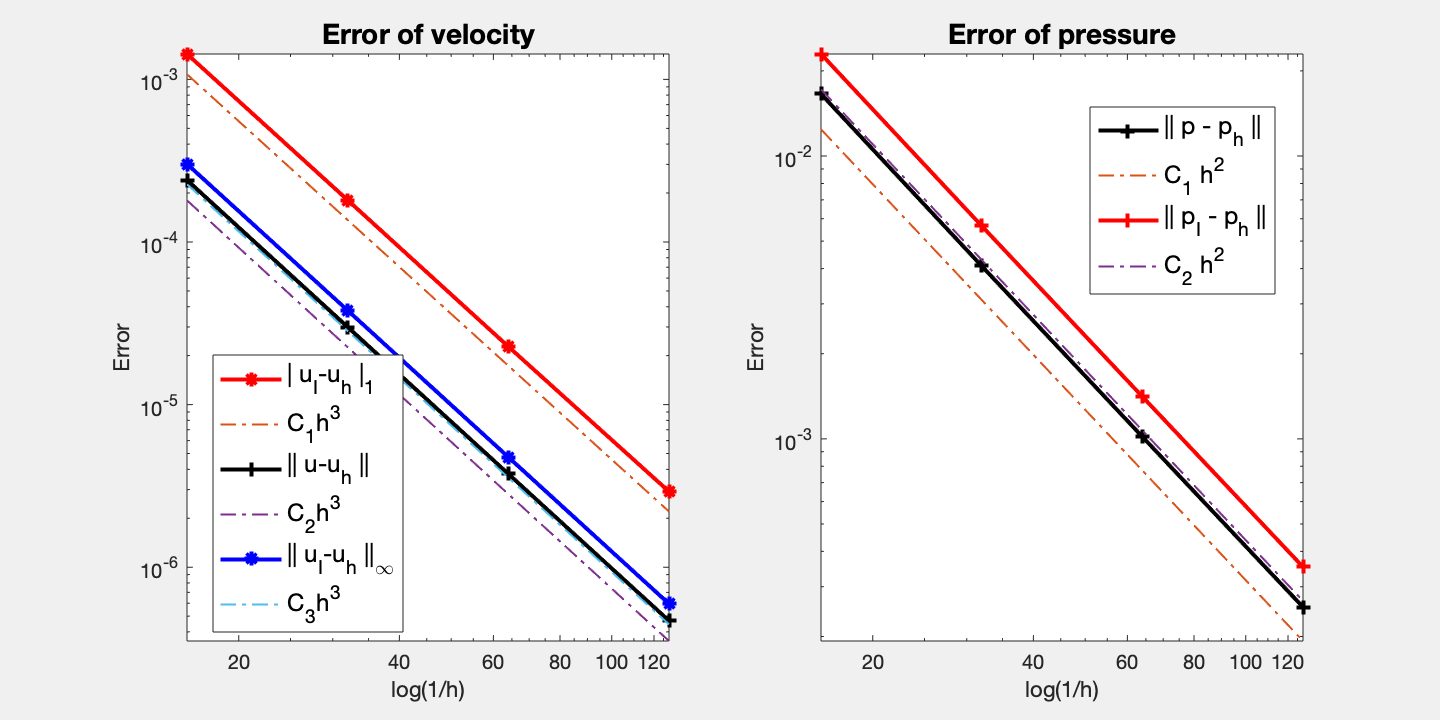

In [5]:
option.elemType = 'P2P1';
femStokes(mesh,pde,option);

## Conclusion

Optimal order convergence of velocity and pressure is observed. Second order for velocity in H1 norm and for pressure in L2 norm. Third order for velocity in L2 and maximum norm. For velocity, superconvergence (3rd order) between nodal interpolate uI and uh is observed.

Multigrid solver based on DGS smoother converges uniformly. 

To-Do: test other boundary conditions.